In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('SF data summary Interpolated lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,212.697917,5.93,55702.0,4149.6070,5.1,284589.3790,761.32167,40.30%,357406.0000,0.30%,1201,2.90,182.9
1,4/1/2005,214.124946,5.86,56203.0,4150.9246,4.7,286369.0239,765.49504,40.30%,359667.0000,0.30%,1239,3.01,182.9
2,5/1/2005,215.514527,5.72,56704.0,4152.2422,4.5,288148.6688,769.66841,40.30%,361928.0000,0.30%,1304,2.58,180.6
3,6/1/2005,216.413650,5.58,57205.0,4153.5598,4.9,289928.3137,773.84178,40.30%,364189.0000,0.30%,1345,3.00,180.6
4,7/1/2005,217.401881,5.70,57706.0,4154.8774,5.0,291707.9586,778.01515,40.23%,365445.0000,0.30%,1337,3.20,183.4
5,8/1/2005,218.820403,5.82,58207.0,4156.1950,4.8,293487.6035,782.18852,40.17%,366701.0000,0.30%,1271,3.19,183.4
6,9/1/2005,219.293373,5.77,58708.0,4157.5126,4.7,295267.2484,786.36189,40.10%,367957.0000,0.30%,2150,3.34,187.2
7,10/1/2005,218.824090,6.07,59209.0,4158.8302,4.6,297046.8933,790.53526,40.13%,370396.3333,0.30%,936,3.54,187.2
8,11/1/2005,218.024126,6.33,59710.0,4160.1478,4.7,298826.5382,794.70863,40.17%,372835.6667,0.30%,1673,3.95,183.1
9,12/1/2005,216.546742,6.27,60211.0,4161.4654,4.1,300606.1831,798.88200,40.20%,375275.0000,0.30%,1228,4.28,183.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,212.697917,5.93,55702.0,4149.6070,5.1,284589.3790,761.32167,357406.0,1201,2.90,182.9,40.30,0.3
1,4/1/2005,214.124946,5.86,56203.0,4150.9246,4.7,286369.0239,765.49504,359667.0,1239,3.01,182.9,40.30,0.3
2,5/1/2005,215.514527,5.72,56704.0,4152.2422,4.5,288148.6688,769.66841,361928.0,1304,2.58,180.6,40.30,0.3
3,6/1/2005,216.413650,5.58,57205.0,4153.5598,4.9,289928.3137,773.84178,364189.0,1345,3.00,180.6,40.30,0.3
4,7/1/2005,217.401881,5.70,57706.0,4154.8774,5.0,291707.9586,778.01515,365445.0,1337,3.20,183.4,40.23,0.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,55702.00,4149.60700,5.1,284589.3790,761.321670,357406.0000,1201,2.90,182.900,40.30,0.30
1,5.86,56203.00,4150.92460,4.7,286369.0239,765.495040,359667.0000,1239,3.01,182.900,40.30,0.30
2,5.72,56704.00,4152.24220,4.5,288148.6688,769.668410,361928.0000,1304,2.58,180.600,40.30,0.30
3,5.58,57205.00,4153.55980,4.9,289928.3137,773.841780,364189.0000,1345,3.00,180.600,40.30,0.30
4,5.70,57706.00,4154.87740,5.0,291707.9586,778.015150,365445.0000,1337,3.20,183.400,40.23,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,93754.25,4713.57875,3.6,531109.2540,711.292917,374039.3333,1017,4.51,233.234,34.83,0.60
144,4.20,94343.50,4714.73650,3.4,533931.6640,711.663925,374842.0000,1003,4.54,236.481,35.00,0.60
145,4.05,94932.75,4715.89425,3.2,536754.0740,712.034933,374736.0000,1444,4.08,236.481,34.90,0.57
146,4.01,95522.00,4717.05200,3.1,539576.4840,712.405942,374630.0000,1356,4.52,237.107,34.80,0.53


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.3500,3.935000,4.475000,5.920000,6.76000
Personal_Income,148.0,70666.413851,11008.224825,55702.0000,61805.937500,66959.291665,78580.583335,96111.25000
Resident_Population,148.0,4431.174400,185.730930,4149.6070,4273.439896,4413.151500,4607.273313,4718.20975
Unemployment_Rate,148.0,6.155405,2.226015,3.1000,4.300000,5.100000,8.300000,10.30000
GDP,148.0,375420.703011,73507.057050,284589.3790,316462.431025,341748.344400,431348.053700,542398.89400
Crime_Rate,148.0,776.137327,65.000438,659.6285,716.068827,781.297558,831.682687,875.63750
Median_Debt,148.0,387934.425676,20037.012530,357406.0000,370045.500000,378857.000000,406587.583300,421588.00000
New_Structures,148.0,823.364865,459.892566,136.0000,424.750000,792.500000,1156.750000,2358.00000
Economic_Conditions_Index,148.0,3.049189,3.424656,-9.4500,2.260000,4.140000,5.250000,7.04000
CPI all items less shelter,148.0,213.233622,16.072421,180.6000,200.223000,216.676000,228.275000,237.10700


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.359385,-1.515996,-0.474123,-1.235682,-0.227932,-1.523602,0.821138,-0.043563,-1.887309,0.743469,-1.085710
1,1.011570,-1.313873,-1.508902,-0.653817,-1.211471,-0.163726,-1.410760,0.903766,-0.011443,-1.887309,0.743469,-1.085710
2,0.877419,-1.268362,-1.501808,-0.743663,-1.187261,-0.099521,-1.297919,1.045103,-0.137003,-2.030411,0.743469,-1.085710
3,0.743268,-1.222851,-1.494714,-0.563970,-1.163050,-0.035316,-1.185078,1.134254,-0.014363,-2.030411,0.743469,-1.085710
4,0.858255,-1.177339,-1.487620,-0.519047,-1.138840,0.028889,-1.122394,1.116859,0.044037,-1.856200,0.712323,-1.085710
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,2.097326,1.520503,-1.147973,2.118008,-0.997600,-0.693471,0.421044,0.426557,1.244391,-1.690347,-0.958115
144,-0.579076,2.150854,1.526736,-1.237820,2.156405,-0.991892,-0.653412,0.390602,0.435317,1.446414,-1.614708,-0.958115
145,-0.722809,2.204382,1.532969,-1.327667,2.194801,-0.986184,-0.658702,1.349522,0.300997,1.446414,-1.659202,-0.970874
146,-0.761138,2.257910,1.539203,-1.372590,2.233198,-0.980476,-0.663992,1.158173,0.429477,1.485363,-1.703695,-0.987887


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

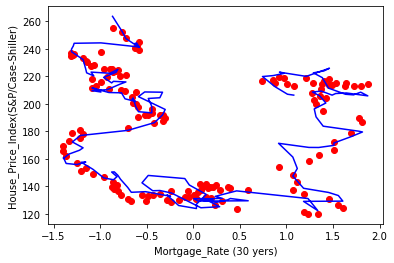

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 6.27
Accuracy: 96.21 %.


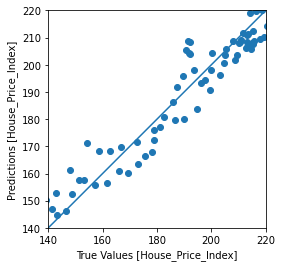

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9654767226894867

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-11.317015
1,72.944149
2,-103.994636
3,16.360862
4,40.200553
5,25.544044
6,-21.588995
7,0.528415
8,1.004017
9,-19.113664


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[206.36606884 207.02038671 212.51168552 219.89930388 220.59512132
 222.18753671 223.072178   220.01461415 225.9397926  224.03290671
 222.56853903 219.1035631  211.44494353 206.99459554 206.56427396
 208.50941769 205.82879195 207.93368414 207.53905127 206.37837608
 209.30141267 208.65632888 205.87414758 200.64601694 196.34653928
 190.569562   183.77119308 180.11676133 179.5570597  176.08847485
 171.54679716 169.80687345 168.27499296 168.31873259 171.31529967
 161.29897327 152.96303365 147.50373455 138.5941083  135.56020615
 133.31413023 129.23702996 129.07443964 122.30881201 131.13223808
 136.69926191 132.685014   131.27911367 131.0157721  131.0759236
 129.26784815 129.49858608 131.1495753  130.17907179 128.31468126
 130.32460857 131.10995655 129.4923609  129.71708175 130.05661053
 129.55485492 125.17626588 124.41409905 129.34863338 135.14345555
 136.97166213 136.79119164 142.55494683 147.93462123 145.65638655
 140.99196106 134.11707714 127.01047231 123.84373206 126.0681767
 133.7344728

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,206.366069
1,207.020387
2,212.511686
3,219.899304
4,220.595121
...,...
143,244.340179
144,241.056014
145,247.527731
146,252.414063


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.359385,-1.313873,-1.268362,-1.222851,-1.177339,-1.131828,-1.086316,-1.040805,-0.995293,-0.949782,...,1.864023,1.908967,1.953911,1.998854,2.043798,2.097326,2.150854,2.204382,2.257910,2.311439
Resident_Population,-1.515996,-1.508902,-1.501808,-1.494714,-1.487620,-1.480526,-1.473431,-1.466337,-1.459243,-1.452149,...,1.470796,1.481664,1.492532,1.503401,1.514269,1.520503,1.526736,1.532969,1.539203,1.545436
Unemployment_Rate,-0.474123,-0.653817,-0.743663,-0.563970,-0.519047,-0.608893,-0.653817,-0.698740,-0.653817,-0.923357,...,-1.058127,-1.058127,-1.147973,-1.192897,-1.013203,-1.147973,-1.237820,-1.327667,-1.372590,-1.192897
GDP,-1.235682,-1.211471,-1.187261,-1.163050,-1.138840,-1.114629,-1.090418,-1.066208,-1.041997,-1.017787,...,1.879134,1.929254,1.979373,2.029492,2.079612,2.118008,2.156405,2.194801,2.233198,2.271594
Crime_Rate,-0.227932,-0.163726,-0.099521,-0.035316,0.028889,0.093095,0.157300,0.221505,0.285710,0.349916,...,-0.754150,-0.839105,-0.924060,-1.009015,-1.003307,-0.997600,-0.991892,-0.986184,-0.980476,-0.974768
Median_Debt,-1.523602,-1.410760,-1.297919,-1.185078,-1.122394,-1.059710,-0.997026,-0.875285,-0.753543,-0.631802,...,-0.775536,-0.774887,-0.774238,-0.773590,-0.733530,-0.693471,-0.653412,-0.658702,-0.663992,-0.669283
New_Structures,0.821138,0.903766,1.045103,1.134254,1.116859,0.973347,2.884663,0.244916,1.847464,0.879847,...,1.956185,1.251673,1.680034,1.449545,0.033997,0.421044,0.390602,1.349522,1.158173,3.336943
Economic_Conditions_Index,-0.043563,-0.011443,-0.137003,-0.014363,0.044037,0.041117,0.084917,0.143317,0.263037,0.359397,...,0.411957,0.321437,0.283477,0.236757,0.315597,0.426557,0.435317,0.300997,0.429477,0.487877
CPI all items less shelter,-1.887309,-1.887309,-2.030411,-2.030411,-1.856200,-1.856200,-1.619770,-1.619770,-1.874865,-1.874865,...,1.267101,1.267101,1.141109,1.141109,1.244391,1.244391,1.446414,1.446414,1.485363,1.485363


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.359385,-1.313873,-1.268362,-1.222851,-1.177339,-1.131828,-1.086316,-1.040805,-0.995293,...,1.864023,1.908967,1.953911,1.998854,2.043798,2.097326,2.150854,2.204382,2.257910,2.311439
2,Resident_Population,-1.515996,-1.508902,-1.501808,-1.494714,-1.487620,-1.480526,-1.473431,-1.466337,-1.459243,...,1.470796,1.481664,1.492532,1.503401,1.514269,1.520503,1.526736,1.532969,1.539203,1.545436
3,Unemployment_Rate,-0.474123,-0.653817,-0.743663,-0.563970,-0.519047,-0.608893,-0.653817,-0.698740,-0.653817,...,-1.058127,-1.058127,-1.147973,-1.192897,-1.013203,-1.147973,-1.237820,-1.327667,-1.372590,-1.192897
4,GDP,-1.235682,-1.211471,-1.187261,-1.163050,-1.138840,-1.114629,-1.090418,-1.066208,-1.041997,...,1.879134,1.929254,1.979373,2.029492,2.079612,2.118008,2.156405,2.194801,2.233198,2.271594
5,Crime_Rate,-0.227932,-0.163726,-0.099521,-0.035316,0.028889,0.093095,0.157300,0.221505,0.285710,...,-0.754150,-0.839105,-0.924060,-1.009015,-1.003307,-0.997600,-0.991892,-0.986184,-0.980476,-0.974768
6,Median_Debt,-1.523602,-1.410760,-1.297919,-1.185078,-1.122394,-1.059710,-0.997026,-0.875285,-0.753543,...,-0.775536,-0.774887,-0.774238,-0.773590,-0.733530,-0.693471,-0.653412,-0.658702,-0.663992,-0.669283
7,New_Structures,0.821138,0.903766,1.045103,1.134254,1.116859,0.973347,2.884663,0.244916,1.847464,...,1.956185,1.251673,1.680034,1.449545,0.033997,0.421044,0.390602,1.349522,1.158173,3.336943
8,Economic_Conditions_Index,-0.043563,-0.011443,-0.137003,-0.014363,0.044037,0.041117,0.084917,0.143317,0.263037,...,0.411957,0.321437,0.283477,0.236757,0.315597,0.426557,0.435317,0.300997,0.429477,0.487877
9,CPI all items less shelter,-1.887309,-1.887309,-2.030411,-2.030411,-1.856200,-1.856200,-1.619770,-1.619770,-1.874865,...,1.267101,1.267101,1.141109,1.141109,1.244391,1.244391,1.446414,1.446414,1.485363,1.485363


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-11.317015
1,Personal_Income,72.944149
2,Resident_Population,-103.994636
3,Unemployment_Rate,16.360862
4,GDP,40.200553
5,Crime_Rate,25.544044
6,Median_Debt,-21.588995
7,New_Structures,0.528415
8,Economic_Conditions_Index,1.004017
9,CPI all items less shelter,-19.113664


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

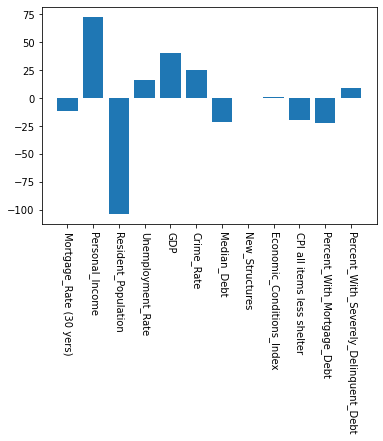

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,7/1/2017,240.733514,3.97,96700.5000,4719.367500,3.7,545221.3040,713.147958,34.70%,374736.6667,0.50%,1407,4.30,235.803
1,8/1/2017,242.109323,3.88,97289.7500,4720.525250,3.6,548043.7140,713.518967,34.70%,374949.3333,0.50%,1582,4.20,235.803
2,9/1/2017,244.795861,3.81,97879.0000,4721.683000,3.1,550866.1240,713.889975,34.70%,375162.0000,0.50%,906,4.48,237.011
3,10/1/2017,248.251792,3.90,98468.2500,4722.840750,3.0,553688.5340,714.260983,34.60%,375460.3333,0.50%,1576,4.61,237.011
4,11/1/2017,252.430756,3.92,99057.5000,4723.998500,2.9,556510.9440,714.631992,34.50%,375758.6667,0.50%,1372,4.82,236.108
5,12/1/2017,255.294023,3.95,99646.7500,4725.156250,2.8,559333.3540,715.003000,34.40%,376057.0000,0.50%,2004,4.95,236.108
6,1/1/2018,258.569765,4.03,100236.0000,4726.314000,3.1,562155.7640,712.993958,34.53%,375355.6667,0.50%,933,5.02,240.742
7,2/1/2018,260.248492,4.33,100626.4167,4726.771417,3.0,564638.2383,710.984917,34.67%,374654.3333,0.50%,1366,4.95,240.742
8,3/1/2018,261.822888,4.44,101016.8333,4727.228833,2.9,567120.7127,708.975875,34.80%,373953.0000,0.50%,2049,4.13,242.950
9,4/1/2018,261.714329,4.47,101407.2500,4727.686250,2.6,569603.1870,706.966833,34.67%,373714.3333,0.47%,1783,4.11,242.950


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,240.733514,3.97,96700.50,4719.36750,3.7,545221.304,713.147958,374736.6667,1407,4.30,235.803,34.7,0.5
1,8/1/2017,242.109323,3.88,97289.75,4720.52525,3.6,548043.714,713.518967,374949.3333,1582,4.20,235.803,34.7,0.5
2,9/1/2017,244.795861,3.81,97879.00,4721.68300,3.1,550866.124,713.889975,375162.0000,906,4.48,237.011,34.7,0.5
3,10/1/2017,248.251792,3.90,98468.25,4722.84075,3.0,553688.534,714.260983,375460.3333,1576,4.61,237.011,34.6,0.5
4,11/1/2017,252.430756,3.92,99057.50,4723.99850,2.9,556510.944,714.631992,375758.6667,1372,4.82,236.108,34.5,0.5


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,96700.5000,4719.367500,3.7,545221.3040,713.147958,374736.6667,1407,4.30,235.803,34.70,0.50
1,3.88,97289.7500,4720.525250,3.6,548043.7140,713.518967,374949.3333,1582,4.20,235.803,34.70,0.50
2,3.81,97879.0000,4721.683000,3.1,550866.1240,713.889975,375162.0000,906,4.48,237.011,34.70,0.50
3,3.90,98468.2500,4722.840750,3.0,553688.5340,714.260983,375460.3333,1576,4.61,237.011,34.60,0.50
4,3.92,99057.5000,4723.998500,2.9,556510.9440,714.631992,375758.6667,1372,4.82,236.108,34.50,0.50
5,3.95,99646.7500,4725.156250,2.8,559333.3540,715.003000,376057.0000,2004,4.95,236.108,34.40,0.50
6,4.03,100236.0000,4726.314000,3.1,562155.7640,712.993958,375355.6667,933,5.02,240.742,34.53,0.50
7,4.33,100626.4167,4726.771417,3.0,564638.2383,710.984917,374654.3333,1366,4.95,240.742,34.67,0.50
8,4.44,101016.8333,4727.228833,2.9,567120.7127,708.975875,373953.0000,2049,4.13,242.950,34.80,0.50
9,4.47,101407.2500,4727.686250,2.6,569603.1870,706.966833,373714.3333,1783,4.11,242.950,34.67,0.47


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.81000,3.915000,4.000000,4.447500,4.590000
Personal_Income,12.0,99692.833333,1820.080926,96700.50000,98320.937500,99941.375000,101114.437475,102188.083300
Resident_Population,12.0,4724.859708,3.134893,4719.36750,4722.551313,4725.735125,4727.343187,4728.601083
Unemployment_Rate,12.0,3.008333,0.362963,2.40000,2.875000,3.000000,3.100000,3.700000
GDP,12.0,560319.639417,9645.521478,545221.30400,552982.931500,560744.559000,567741.331275,574568.135700
Crime_Rate,12.0,711.023417,4.099049,702.94875,708.473615,713.070958,713.982727,715.003000
Median_Debt,12.0,374709.500000,925.256554,373237.00000,373893.333325,374843.000000,375381.833350,376057.000000
New_Structures,12.0,1431.250000,385.254373,906.00000,1112.750000,1389.500000,1632.250000,2049.000000
Economic_Conditions_Index,12.0,4.490833,0.361976,4.11000,4.175000,4.390000,4.852500,5.020000
CPI all items less shelter,12.0,239.543000,3.599578,235.80300,236.108000,238.876500,242.950000,244.644000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.364967,1.551670,-1.103050,2.309990,-0.969061,-0.658669,1.269068,0.365237,1.404230,-1.748189,-1.000647
1,-0.885706,2.418495,1.557903,-1.147973,2.348387,-0.963353,-0.648055,1.649592,0.336037,1.404230,-1.748189,-1.000647
2,-0.952782,2.472023,1.564137,-1.372590,2.386783,-0.957645,-0.637442,0.179684,0.417797,1.479390,-1.748189,-1.000647
3,-0.866542,2.525551,1.570370,-1.417513,2.425180,-0.951937,-0.622553,1.636546,0.455757,1.479390,-1.792683,-1.000647
4,-0.847378,2.579079,1.576604,-1.462437,2.463576,-0.946230,-0.607663,1.192964,0.517077,1.423207,-1.837177,-1.000647
5,-0.818631,2.632608,1.582837,-1.507360,2.501973,-0.940522,-0.592774,2.567198,0.555037,1.423207,-1.881671,-1.000647
6,-0.741973,2.686136,1.589071,-1.372590,2.540369,-0.971430,-0.627776,0.238393,0.575477,1.711527,-1.823829,-1.000647
7,-0.454507,2.721602,1.591534,-1.417513,2.574141,-1.002338,-0.662778,1.179917,0.555037,1.711527,-1.761538,-1.000647
8,-0.349103,2.757068,1.593996,-1.462437,2.607913,-1.033246,-0.697780,2.665047,0.315597,1.848905,-1.703695,-1.000647
9,-0.320356,2.792533,1.596459,-1.597207,2.641685,-1.064154,-0.709691,2.086651,0.309757,1.848905,-1.761538,-1.013406


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[269.46232836 274.59161532 274.26111072 278.9829214  284.55692338
 289.88572385 287.96747365 286.71008752 285.05472666 286.55264984
 285.41962559 294.33821331]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,269.462328
1,274.591615
2,274.261111
3,278.982921
4,284.556923
5,289.885724
6,287.967474
7,286.710088
8,285.054727
9,286.552650
